ASSIGNMENT - KNN on claimants.csv

In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler

In [4]:
from pandas import read_csv
claimants = read_csv("F:\\Data Science\\Data Sets\\claimants.csv") 
claimants

,CASENUM,ATTORNEY,CLMSEX,CLMINSUR,SEATBELT,CLMAGE,LOSS
0,5,0,0.0,1.0,0.0,50.0,34.940
1,3,1,1.0,0.0,0.0,18.0,0.891
2,66,1,0.0,1.0,0.0,5.0,0.330
3,70,0,0.0,1.0,1.0,31.0,0.037
4,96,1,0.0,1.0,0.0,30.0,0.038
...,...,...,...,...,...,...,...
1335,34100,1,0.0,1.0,0.0,NaN,0.576
1336,34110,0,1.0,1.0,0.0,46.0,3.705
1337,34113,1,1.0,1.0,0.0,39.0,0.099
1338,34145,0,1.0,0.0,0.0,8.0,3.177


In [5]:
claimants.dtypes

CASENUM       int64
ATTORNEY      int64
CLMSEX      float64
CLMINSUR    float64
SEATBELT    float64
CLMAGE      float64
LOSS        float64
dtype: object

In [6]:
claimants.shape

(1340, 7)

In [7]:
claimants.isnull().sum()

CASENUM       0
ATTORNEY      0
CLMSEX       12
CLMINSUR     41
SEATBELT     48
CLMAGE      189
LOSS          0
dtype: int64

In [8]:
claimants = claimants.dropna()

In [9]:
claimants.shape

(1096, 7)

In [10]:
array = claimants.values
X = array[:,2:7]
Y = array[:,1]

In [11]:
X

array([[ 0.   ,  1.   ,  0.   , 50.   , 34.94 ],
       [ 1.   ,  0.   ,  0.   , 18.   ,  0.891],
       [ 0.   ,  1.   ,  0.   ,  5.   ,  0.33 ],
       ...,
       [ 1.   ,  1.   ,  0.   , 39.   ,  0.099],
       [ 1.   ,  0.   ,  0.   ,  8.   ,  3.177],
       [ 1.   ,  1.   ,  0.   , 30.   ,  0.688]])

In [12]:
Y

array([0., 1., 1., ..., 1., 0., 1.])

In [13]:
scale = StandardScaler()
scaled_data = scale.fit_transform(X)
scaled_data

array([[-1.13916369,  0.32550512, -0.13633547,  1.05048704,  2.96924493],
       [ 0.87783697, -3.07214831, -0.13633547, -0.51942439, -0.28328699],
       [-1.13916369,  0.32550512, -0.13633547, -1.15720091, -0.33687653],
       ...,
       [ 0.87783697,  0.32550512, -0.13633547,  0.51082998, -0.35894281],
       [ 0.87783697, -3.07214831, -0.13633547, -1.01002171, -0.06491676],
       [ 0.87783697,  0.32550512, -0.13633547,  0.0692924 , -0.30267857]])

In [14]:
X = scaled_data
X

array([[-1.13916369,  0.32550512, -0.13633547,  1.05048704,  2.96924493],
       [ 0.87783697, -3.07214831, -0.13633547, -0.51942439, -0.28328699],
       [-1.13916369,  0.32550512, -0.13633547, -1.15720091, -0.33687653],
       ...,
       [ 0.87783697,  0.32550512, -0.13633547,  0.51082998, -0.35894281],
       [ 0.87783697, -3.07214831, -0.13633547, -1.01002171, -0.06491676],
       [ 0.87783697,  0.32550512, -0.13633547,  0.0692924 , -0.30267857]])

In [15]:
num_folds = 10
kfold = KFold(n_splits = 10)
kfold

KFold(n_splits=10, random_state=None, shuffle=False)

In [16]:
model = KNeighborsClassifier(n_neighbors = 17)
results = cross_val_score( model, X, Y, cv = kfold)
results

array([0.67272727, 0.63636364, 0.67272727, 0.62727273, 0.7       ,
       0.63636364, 0.62385321, 0.67889908, 0.66055046, 0.70642202])

In [17]:
results.mean()

0.6615179316096749

GRID SEARCH

In [18]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [19]:
n_neighbors = np.array(range(1,41))
param_grid = dict( n_neighbors = n_neighbors)
param_grid

{'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40])}

In [20]:
model = KNeighborsClassifier()
grid = GridSearchCV( estimator = model, param_grid = param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40])})

In [21]:
print(grid.best_score_)
print(grid.best_params_)

0.6797509339975093
{'n_neighbors': 38}


In [22]:
model = KNeighborsClassifier(n_neighbors = 38)

In [23]:
scores = cross_val_score(model, X, Y, cv = 5)
scores

array([0.67272727, 0.63926941, 0.68949772, 0.67123288, 0.7260274 ])

In [24]:
scores.mean()

0.6797509339975093

VISUALIZATION

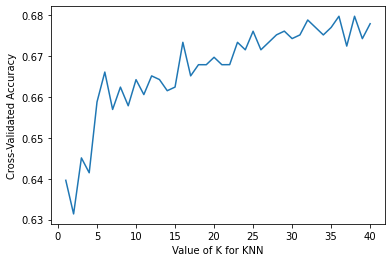

In [25]:
import matplotlib.pyplot as plt
%matplotlib inline
# choose k between 1 to 41
k_range = range(1,41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    scores = cross_val_score(knn, X, Y, cv = 5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()